# Clustering (5 points)

Données :
<pre>x1 x2
0  3
1  2
2  1
3  3
3  4
4  1</pre>

Appliquer en détaillant raisonnablement chaque étape...

1. L'algorithme des k-means avec $K=2$. (2 points) <br>
Centres initiaux : (0,2) et (3,1), puis (1,2) et (2,0).<br>
Donnez les centres finaux ainsi que les compositions des clusters.

Je (presque)calcule ici toutes les distances au carré (il n'y en a pas tant). S'aider du graphique permet d'en calculer encore moins.

## Centres c1 = (0,2) et c2 = (3,1) :

distance à c1 / distance à c2
<pre>1 10
1 5
5 1
10 4
13 9
17 1</pre>

==> Les deux premiers points sont dans C1, les 4 suivants dans C2.
On recalcule les centres :

c1 <- ( (0+1)/2, (3+2)/2 ) = (0.5, 2.5)<br>
c2 <- ( (2+3+3+4)/4, (1+3+4+1)/4 ) = (3, 2.25)

Recalcul des appartenances (je majore/minore les distances parfois : c'est suffisant).

distance à c1 / distance à c2<br>
$0.5 \quad >9$<br>
$0.5 \quad >4$<br>
$4.5 \quad 1+1.25^2 < 3.25$<br>
$>4 \quad <1$<br>
$>5 \quad <4$<br>
$>10 \quad <5$

Les appartenances n'ont pas changé, donc l'algorithme a convergé.

## Centres c1 = (1,2) et c2 = (2,0) :

distance à c1 / distance à c2
<pre>2 13
0 5
2 1
5 10
8 17
10 5</pre>

==> Les points 1, 2 et 4, 5 sont dans C1, les autres dans C2.<br>
On recalcule les centres :

c1 <- ( (0+1+3+3)/4, (3+2+3+4)/4 ) = (1.75, 3)<br>
c2 <- ( (2+4)/2, (1+1)/2 ) = (3, 1)

Recalcul des appartenances (même astuce que ci-dessus) :

distance à c1 / distance à c2<br>
$<4 \quad >9$<br>
$<2 \quad >4$<br>
$>4 \quad 1$<br>
$<2.25 \quad 4$<br>
$<3.25 \quad 9$<br>
$>8 \quad 1$

Les appartenances n'ont pas changé, donc l'algorithme a convergé.

Il est intéressant de constater que les clusters sont très différents, illustrant la sensibilité aux conditions initiales évoquée en cours.

2. L'algorithme de clustering hiérarchique "complete linkage" (3 points) <br>
Dessinez le dendrogramme final. Est-il unique ?

3,3 et 3,4 sont à distance 1 / toutes les autres distances sont supérieures, donc la première fusion concerne ces points (4 et 5).

Ensuite on remarque que $d(1,2) = d(2,3) = \sqrt{2}$ avec $d(i,j)$ distance du $i^{eme}$ point au $j^{eme}$. Comme les distances de ces trois points au plus éloigné du cluster à deux éléments sont >= 2, et que toutes les autres distances sont >= 2 également, on se retrouve face à un choix : fusionner 1 et 2 ou bien 2 et 3. Choisissons 1 et 2.

On voit alors clairement que les deux seuls points isolés restant sont plus proches que toutes les autres distances : d'un point isolé à un cluster on est $>2$, et la distance inter-clusters est $>3$. On se retrouve donc avec trois clusters à deux éléments : 4,5 - 1,2 - 3,6 (distances respectivement 1, $\sqrt{2}$ et 2).

$d^2(4,5 à 1,2) = 10$<br>
$d^2(4,5 à 3,6) = 10$<br>
$d^2(1,2 à 3,6) = 20$

On se retrouve encore face à un choix : disons qu'on fusionne 4,5 avec 1,2 (distance $\sqrt{10}$), et donc finalement ces quatres points avec 3,6 (distance $\sqrt{20}$).

Le dendrogramme n'est pas unique, puisqu'on a s'est retrouvé deux fois face à un choix => il y a au moins trois possibilités. Dessin approximatif : https://www.autodraw.com/share/A7DGJ1U4FOSP

# Chaînes de Markov (5 points)

1. Considérant le mini labyrinthe ci-dessous, modélisez la situation par une chaîne de Markov en supposant un joueur se déplaçant au hasard (uniformément, sans biais). (2 points)

https://www.autodraw.com/share/M90AF2X31IFF

Explications : j'ai simplement considéré que chaque case du labyrinthe correspondait à un état, est les ai numérotées arbitrairement de 1 à 9 en partant d'en bas à gauche jusqu'en haut à droite. Les transitions se déduisent des possibilités de mouvements dans le labyrinthe : par exemple en 5 on est dans un cul-de-sac, pas d'autre choix que de faire demi-tour. En revanche depuis la plupart des autres états on peut aller dans deux directions (donc probabilités 1/2 : pas de préférences), et même trois depuis l'état 4 (donc 1/3 1/3 1/3 : équiprobabilités). Dessiner le graphe avec des états superposés aux cases du labyrinthe facilite nettement le travail - mais il faut garder à l'esprit que ce sont deux objets très différents ! L'un est un dessin, l'autre la modélisation de ce dessin sous la forme d'une chaîne de Markov.

Enfin, j'ai séparé les états Entrée et Sortie. Il n'est pas strictement nécessaire d'ajouter un état d'entrée, on peut très bien le supprimer et dire qu'on démarre dans l'état 1 (mais je trouve ça plus joli, plus symétrique). En revanche l'état de sortie est nécessaire : en effet une fois sur la dernière case on peut se tromper et revenir dans le labyrinthe. Il faut donc un état symbolisant qu'on est sorti : il est absorbant, une fois sorti on ne revient pas.

2. Peut-on passer de n'importe quel état à n'importe quel autre en un nombre quelconque d'étapt (en d'autre termes, la chaîne est-elle irréductible) ? (Justifiez). <br>

Puisque S est absorbant, clairement non.

La chaîne est-elle régulière ? (Rappel : régulière si $\exists n \, / P^n > 0$). (1 point)

Une chaîne régulière est en particulier irréductible (s'il existe un tel $n$ alors il existe un chemin (de longueur $n$) entre toute paire d'états. Donc non la chaîne n'est pas régulière non plus.

3. Comment calculer le temps moyen passé dans le labyrinthe avant de sortir ? Décrivez au moins les étapes. (2 points)

Il faut écrire la matrice correspondant à la chaîne : il y a beaucoup de zéros... J'ai ajouté les noms des états en début de lignes/colonnes pour plus de clarté.

$$P = \begin{pmatrix}
* & E & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & | S\\
E & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & | 0\\
1 & 0 & 0 & 0.5 & 0 & 0.5 & 0 & 0 & 0 & 0 & 0 & | 0\\
2 & 0 & 0.5 & 0 & 0.5 & 0 & 0 & 0 & 0 & 0 & 0 & | 0\\
3 & 0 & 0 & 0.5 & 0 & 0 & 0 & 0.5 & 0 & 0 & 0 & | 0\\
4 & 0 & 1/3 & 0 & 0 & 0 & 1/3 & 0 & 1/3 & 0 & 0 & | 0\\
5 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & | 0\\
6 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & | 0\\
7 & 0 & 0 & 0 & 0 & 0.5 & 0 & 0 & 0 & 0.5 & 0 & | 0\\
8 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.5 & 0 & 0.5 & | 0\\
9 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.5 & 0 & | 0.5\\
\hline
S & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & | 1
\end{pmatrix}$$

Notant alors comme dans le cours $Q$ la matrice obtenue en enlevant la dernière rangée et dernière colonne, on calcule $N = (I - Q)^{-1}$ puis la somme des éléments de la première ligne de $N$ (correspondant au départ dans l'état E). Application numérique avec R ci-après : 64 étapes en moyenne.

Note: E pour "Entrée" et S pour "Sortie".

<img src="labyrinthe.png" style="width:40%">

In [1]:
Q = matrix(
  c(0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0
  ,0 , 0 , 0.5 , 0 , 0.5 , 0 , 0 , 0 , 0 , 0
  ,0 , 0.5 , 0 , 0.5 , 0 , 0 , 0 , 0 , 0 , 0
  ,0 , 0 , 0.5 , 0 , 0 , 0 , 0.5 , 0 , 0 , 0
  ,0 , 1/3 , 0 , 0 , 0 , 1/3 , 0 , 1/3 , 0 , 0
  ,0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0
  ,0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0
  ,0 , 0 , 0 , 0 , 0.5 , 0 , 0 , 0 , 0.5 , 0
  ,0 , 0 , 0 , 0 , 0 , 0 , 0 , 0.5 , 0 , 0.5
  ,0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0.5 , 0), ncol=10, byrow=TRUE)
N = solve(diag(10) - Q)
sum(N[1,])

[1] 64

# Arbres de décision (5 points)

Le jeu de données suivant issu de [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning#Measure_of_%22goodness%22) indique si une banque accordera ou non un prêt selon trois critères :
 - Savings : symbolique "ordonnée" Low, Medium, High ;
 - Assets : symbolique "ordonnée" Low, Medium, High ;
 - Income : numérique en milliers de dollars (par an).

Construisez un arbre de décision **binaire** en utilisant l'indice de Gini :<br>
$I_G = 1 - \sum_{k=1}^{K} p_k^2$, avec $p_k$ proportion de la classe $k$ dans les données du noeud courant.<br>
Détaillez les étapes (4 points) et dessinez l'arbre (1 point).<br>
<i>Hint: variables à considérer = Income, Savings, Income, Assets (dans cet ordre).</i>

| Customer | Savings | Assets | Income ($1000s) | Credit risk |
| --- | --- | --- | --- | --- |
| 1	| Medium | High | 75 | Good |
| 2	| Low | Low | 50 | Bad |
| 3	| High | Medium | 25 | Bad |
| 4	| Medium | Medium | 50 | Good |
| 5	| Low | Medium | 100 | Good |
| 6	| High | High | 25 | Good |
| 7	| Low | Low | 25 | Bad |
| 8	| Medium | Medium | 75 | Good |

Trions suivant Income :

| Customer | Savings | Assets | Income ($1000s) | Credit risk |
| --- | --- | --- | --- | --- |
| 3	| High | Medium | 25 | Bad |
| 6	| High | High | 25 | Good |
| 7	| Low | Low | 25 | Bad |
| 2	| Low | Low | 50 | Bad |
| 4	| Medium | Medium | 50 | Good |
| 1	| Medium | High | 75 | Good |
| 8	| Medium | Medium | 75 | Good |
| 5	| Low | Medium | 100 | Good |

Note : l'ordre des lignes 25, 50 et 75 (même Income) n'a aucune importance, puisque les splits se feront entre ces valeurs (entre 25 et 50, ou entre 50 et 75 etc). On est donc obligés de placer toutes les lignes avec le même Income du même côté du noeud courant de l'arbre (en l'occurrence ici la racine).

Splits potentiels : entre 25 et 50 (A), entre 50 et 75 (B), et entre 75 et 100. Ce dernier n'a aucun intérêt puisque Income = 75 ou 100 correspondent tous deux à Credit risk Good : l'indice de Gini est forcément meilleur en coupant avant 75. Reste à comparer avec le split 25-50 :

$Gini_A = (3/8) ( (1/3)^2 + (2/3)^2 ) + (5/8) ( (1/5)^2 + (4/5)^2 ) \simeq 0.63 $<br>
$Gini_B = (3/8) ( 1 ) + (5/8) ( (3/5)^2 + (2/5)^2 ) = 0.7$

Attention j'écris Gini mais il s'agit de la quantité vue au tableau lundi dernier, obtenue après quelques simplifications. On coupe donc entre 50 et 75 - généralement on choisit le milieu, donc ici 62.5. Au-delà de 62.5 le noeud est pur : Credit risk = Good. On regarde donc de l'autre côté :

| Customer | Savings | Assets | Income ($1000s) | Credit risk |
| --- | --- | --- | --- | --- |
| 3	| High | Medium | 25 | Bad |
| 6	| High | High | 25 | Good |
| 7	| Low | Low | 25 | Bad |
| 2	| Low | Low | 50 | Bad |
| 4	| Medium | Medium | 50 | Good |

Trois divisions potentielles sur Savings : Low vs. Medium,High, (A) High vs. Low,Medium (B) et Medium vs. Low,High (C). Notons toutefois que cette dernière division aurait peu de sens... mais il faut l'essayer.

$Gini_A = (2/5) ( 1 ) + (3/5) ( (1/3)^2 + (2/3)^2 ) \simeq 0.73$<br>
$Gini_B = (2/5) ( 2*(1/2)^2 ) + (3/5) ( (1/3)^2 + (2/3)^2 ) < Gini_A$<br>
$Gini_C = (1/5) ( 1 ) + (4/5) ( (1/4)^2 + (3/4)^2 ) = 0.7$

On coupe donc sur Savings = Low vs. Savings = Medium,High. Le côté Savings==Low est pur (Credit risk Bad), donc on se concentre sur ce qui reste :

| Customer | Savings | Assets | Income ($1000s) | Credit risk |
| --- | --- | --- | --- | --- |
| 3	| High | Medium | 25 | Bad |
| 6	| High | High | 25 | Good |
| 4	| Medium | Medium | 50 | Good |

Considérant à nouveau la variable Income, la seule division possible est entre 25 et 50 : pas de choix donc on l'applique dans rien calculer (même situation qu'avec la variable "Retard" lundi dernier). Notez tout de même que sans l'indication des variables à considérer, il faudrait faire le calcul et le comparer aux splits sur les autres variables.

À droite de (25+50)/2 = 37.5 c'est pur (un seul individu, Credit risk = Good), donc on traite les deux dernières lignes :

| Customer | Savings | Assets | Income ($1000s) | Credit risk |
| --- | --- | --- | --- | --- |
| 3	| High | Medium | 25 | Bad |
| 6	| High | High | 25 | Good |

Finalement, Assets High => Good, et Assets Low,Medium => Bad (ça reste cohérent : ouf !).

Tracé de l'arbre : https://www.autodraw.com/share/C7LSRXLZHDX0

# Analyse en Composantes Principales (5 points)

Le jeu de données suivant (provenant de [cette présentation](https://perso.math.univ-toulouse.fr/gadat/files/2012/12/01-m1-acp.pdf)) contient les notes de 9 étudiants dans 4 matières :

| Nom | MATH | PHYS | FRAN | ANGL |
| --- | --- | --- | --- | --- |
| jean | 6.00 | 6.00 | 5.00 | 5.50 |
| alan | 8.00 | 8.00 | 8.00 | 8.00 |
| anni | 6.00 | 7.00 | 11.00 | 9.50 |
| moni | 14.50 | 14.50 | 15.50 | 15.00 |
| didi | 14.00 | 14.00 | 12.00 | 12.50 |
| andr | 11.00 | 10.00 | 5.50 | 7.00 |
| pier | 5.50 | 7.00 | 14.00 | 11.50 |
| brig | 13.00 | 12.50 | 8.50 | 9.50 |
| evel | 9.00 | 9.50 | 12.50 | 12.00 |

On effectue une ACP (sur les colonnes numériques), puis on affiche le cercle des corrélations ainsi que le nuage des individus.

In [1]:
library(FactoMineR) ; options(repr.plot.width=15, repr.plot.height=9)
data <- matrix(
    c(6,8,6,14.5,14,11,5.5,13,9, 6,8,7,14.5,14,10,7,12.5,9.5,
    5,8,11,15.5,12,5.5,14,8.5,12.5, 5.5,8,9.5,15,12.5,7,11.5,9.5,12), ncol=4)
rownames(data) <- c("jean","alan","anni","moni","didi","andr","pier","brig","evel")
colnames(data) <- c("MATH", "PHYS", "FRAN", "ANGL")
res <- PCA(data)

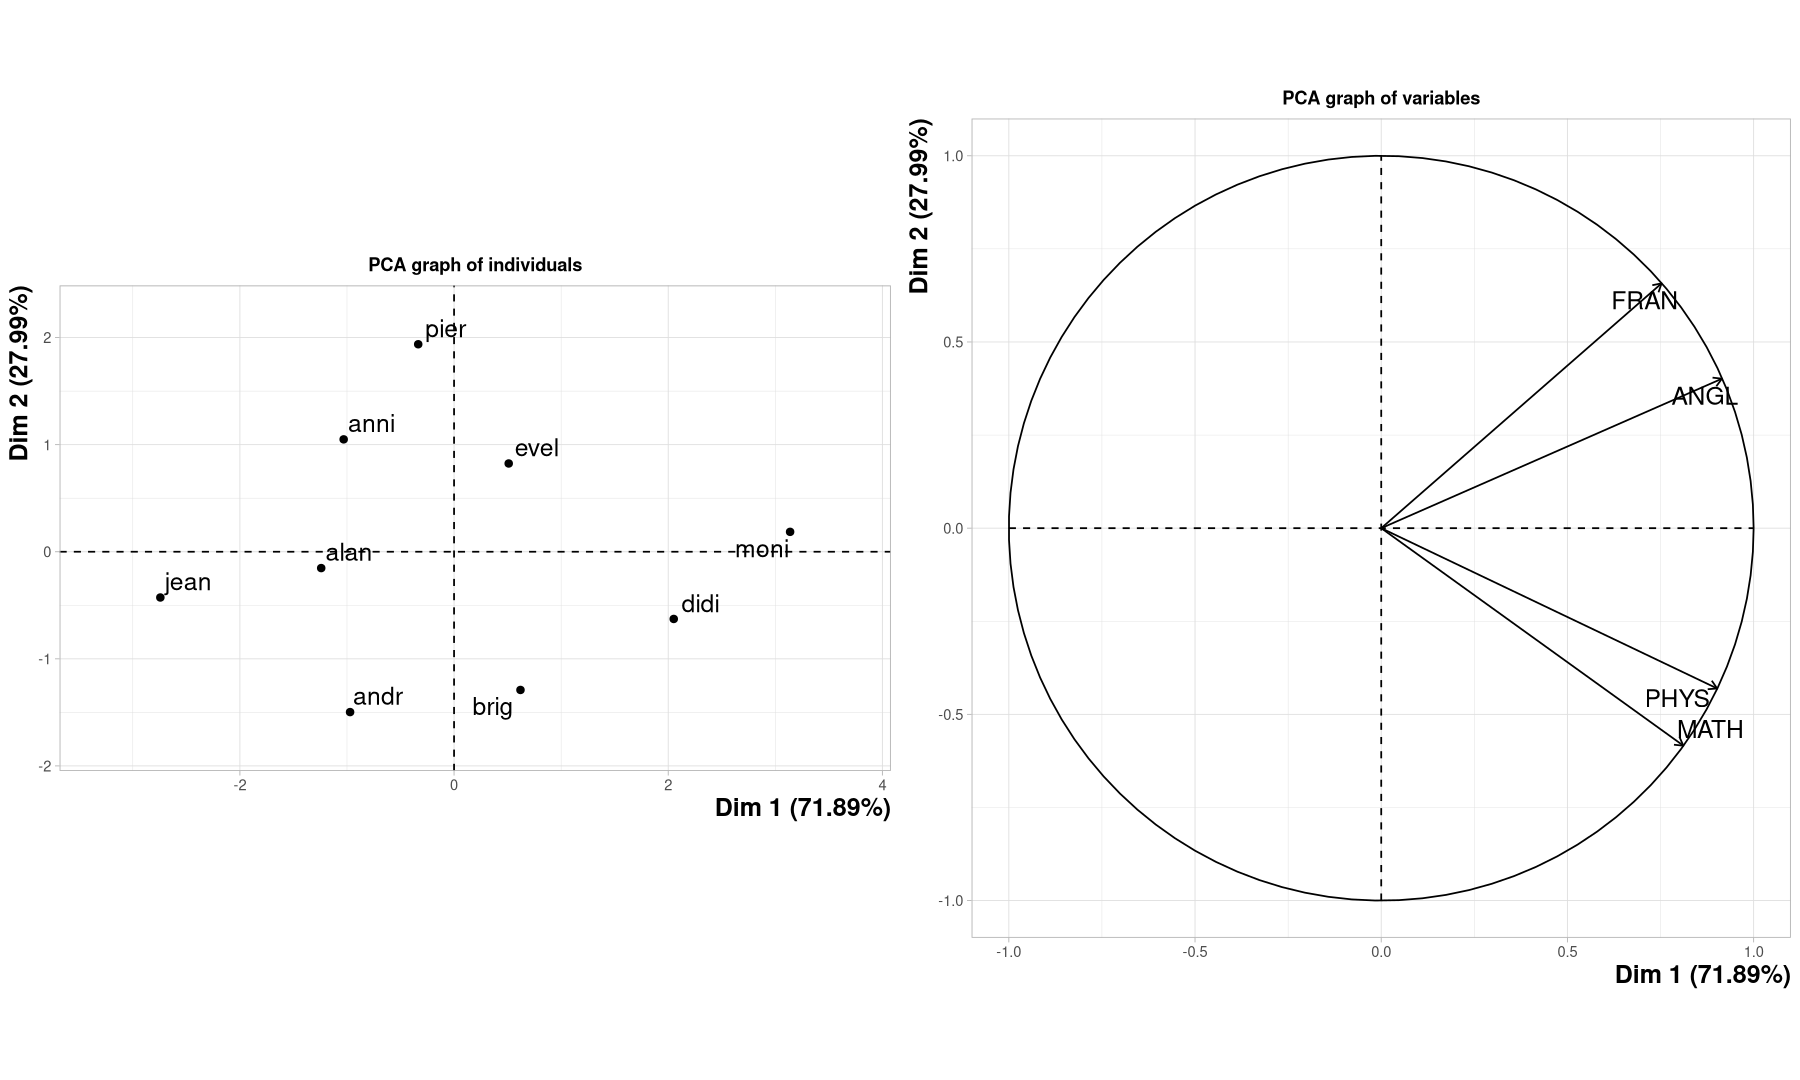

In [2]:
library(gridExtra)
grid.arrange(
    plot(res, choix="ind", cex.axis=1.5, cex=1.3),
    plot(res, choix="var", cex.axis=1.5, cex=1.3), ncol=2)

1. A-t-on intérêt à choisir plus de deux axes ? Justifiez. (1 point)  

La somme des inerties des deux premiers axes vaut plus de 99% (71.89 + 27.99), donc non il n'y a aucun intérêt à regarder plus loin.

2. Que pouvez-vous déduire de la représentation des variables à droite ? Justifiez. (2 points)

Les flèches touchent le cercle, donc les variables sont parfaitement représentées et les angles interprétables sans risque. On conclut alors que les matières français/anglais sont très corrélées, ainci que les matières physique/mathématiques. C'est assez cohérent, au lycée on est souvent bon dans plusieurs matières scientifiques et/ou dans plusieurs matières littéraires simultanément. Le cercle des corrélations indique également une certaine corrélation entre toutes les matières - bien que nettement moins marquée : c'est logique aussi, les très bons élèves ayant tendance à avoir des bonnes notes partout, et les très mauvais des mauvaises partout.

3. En observant les individus extrêmes et en vous aidant du cercle des corrélations, interprétez les axes 1 et 2. (2 points)

Extrêmes sur l'axe 1 : jean vs. moni
<pre>jean	6.00	6.00	5.00	5.50
moni	14.50	14.50	15.50	15.00</pre>
Jean a des mauvaises notes partout, et Monique des bonnes notes partout : cela confirme la tendance gauche/droite observée sur le cercle des corrélations : l'axe 1 indique la performance d'un étudiant.

Extrêmes sur l'axe 2 : andr vs. pier
<pre>andr	11.00	10.00	5.50	7.00
pier	5.50	7.00	14.00	11.50</pre>
André est relativement plutôt bon dans les matières littéraires, et mauvais dans les matières scientifiques. C'est clairement le contraire pour Pierre, et on conclut donc conformément à la séparation nord/sud des flèches représentant les variables à droite que l'axe 2 oppose matières littéraires et scientifiques.